In [61]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/ctd/2024-02_data_all_exo.csv')
df = df[df['station'] < 32]

data = pd.read_csv("/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/data_for_henry_2024.csv")
data = data[data['date'] == '2/1/24']

df = df.rename(columns={"GPS.Latitude..": "lat", "GPS.Longitude..": "long", "Depth.m":"depth","Sal.psu":"salt","Temp..C":"temp"})
df = df[['lat','long','depth','salt','station','temp','pH']]

'''
TODO: get first and last values for temperature and salinity with respect to depth. 
then add as variable surf_temp, bot_temp, surf_salt, bot_salt and calculate stratification
'''


'\nTODO: get first and last values for temperature and salinity with respect to depth. \nthen add as variable surf_temp, bot_temp, surf_salt, bot_salt and calculate stratification\n'

In [62]:
# Group by station
grouped = df.groupby('station')

# Initialize lists to hold the aggregated data
stations = []
surface_temps = []
surface_salts = []
surface_pHs = []
bottom_temps = []
bottom_salts = []
bottom_pHs = []
latitudes = []
longitudes = []

# Iterate over each group
for station, group in grouped:
    # Find the row with the minimum depth (surface)
    min_depth_row = group.loc[group['depth'].idxmin()]
    # Find the row with the maximum depth (bottom)
    max_depth_row = group.loc[group['depth'].idxmax()]
    
    # Append the results to the lists
    stations.append(station)
    surface_temps.append(min_depth_row['temp'])
    surface_salts.append(min_depth_row['salt'])
    surface_pHs.append(min_depth_row['pH'])
    bottom_temps.append(max_depth_row['temp'])
    bottom_salts.append(max_depth_row['salt'])
    bottom_pHs.append(max_depth_row['pH'])
    latitudes.append(min_depth_row['lat'])  # assuming latitude is constant for each station
    longitudes.append(min_depth_row['long'])  # assuming longitude is constant for each station

# Create a new dataframe with the aggregated data
aggregated_df = pd.DataFrame({
    'station': stations,
    'latitude': latitudes,
    'longitude': longitudes,
    'surface_temp': surface_temps,
    'surface_salt': surface_salts,
    # 'surface_pH': surface_pHs,
    'bottom_temp': bottom_temps,
    'bottom_salt': bottom_salts,
    # 'bottom_pH': bottom_pHs
})

# Perform an inner join on the 'station' column
merged_df = data.merge(aggregated_df, on='station', how='inner')
fish_asvs = merged_df.iloc[:,11:86]
merged_df

,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,primers,...,Whitefish_Cor,Pac_sand_lance,White_catfish,Atl_salmon,latitude,longitude,surface_temp,surface_salt,bottom_temp,bottom_salt
0,NJOT_Feb_24_3,NJOT,2/1/24,Feb_24,edna,Trawl,3,B,1,bony,...,0.0,0.0,0.0,0.0,39.182897,-74.204214,7.207000,19.924286,6.984000,22.357692
1,NJOT_Feb_24_5,NJOT,2/1/24,Feb_24,edna,Trawl,5,B,1,bony,...,0.0,0.0,0.0,0.0,39.104352,-74.207144,7.572200,0.060000,7.327800,0.037500
2,NJOT_Feb_24_6,NJOT,2/1/24,Feb_24,edna,Trawl,6,B,1,bony,...,0.0,0.0,0.0,0.0,39.272691,-74.092105,7.175250,18.300000,7.034833,22.330000
3,NJOT_Feb_24_7,NJOT,2/1/24,Feb_24,edna,Trawl,7,B,1,bony,...,0.0,0.0,0.0,0.0,39.325567,-74.050293,7.141714,0.008571,6.951571,0.066429
4,NJOT_Feb_24_8,NJOT,2/1/24,Feb_24,edna,Trawl,8,B,1,bony,...,0.0,0.0,0.0,0.0,39.215071,-74.129712,7.747545,21.470000,7.162100,22.380000
5,NJOT_Feb_24_10,NJOT,2/1/24,Feb_24,edna,Trawl,10,B,1,bony,...,0.0,0.0,0.0,0.0,39.217271,-74.052457,7.412000,22.007000,7.383020,22.400000
6,NJOT_Feb_24_11,NJOT,2/1/24,Feb_24,edna,Trawl,11,B,1,bony,...,0.0,0.0,0.0,0.0,39.216981,-74.440575,5.550700,0.083000,5.717857,0.105000
7,NJOT_Feb_24_14,NJOT,2/1/24,Feb_24,edna,Trawl,14,B,1,bony,...,0.0,0.0,0.0,0.0,39.403917,-74.286663,4.890875,19.000000,5.516107,20.027500
8,NJOT_Feb_24_15,NJOT,2/1/24,Feb_24,edna,Trawl,15,B,1,bony,...,0.0,0.0,0.0,0.0,39.550527,-74.130042,6.065100,18.135000,6.225100,21.723000
9,NJOT_Feb_24_16,NJOT,2/1/24,Feb_24,edna,Trawl,16,B,1,bony,...,0.0,0.0,0.0,0.0,39.472763,-74.004055,6.678375,22.031250,6.654333,22.150000


### REGRESSION MODEL 

Used a tSNE 2D encoding and appended onto merged dataset. Then, used oceanographic variables to predict tSNE 2D encoding.

In [63]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=30, perplexity=20, learning_rate=10, n_iter=1000) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
merged_df['tSNE1'] = tsne_result[:, 0]
merged_df['tSNE2'] = tsne_result[:, 1]
# merged_df

ml_df = merged_df.iloc[:,86:]
ml_df

,latitude,longitude,surface_temp,surface_salt,bottom_temp,bottom_salt,tSNE1,tSNE2
0,39.182897,-74.204214,7.207000,19.924286,6.984000,22.357692,-1.199833,0.834129
1,39.104352,-74.207144,7.572200,0.060000,7.327800,0.037500,-1.163779,0.858735
2,39.272691,-74.092105,7.175250,18.300000,7.034833,22.330000,-1.221432,0.906516
3,39.325567,-74.050293,7.141714,0.008571,6.951571,0.066429,-1.181889,0.860468
4,39.215071,-74.129712,7.747545,21.470000,7.162100,22.380000,-1.203112,0.830597
5,39.217271,-74.052457,7.412000,22.007000,7.383020,22.400000,-1.198773,0.819332
6,39.216981,-74.440575,5.550700,0.083000,5.717857,0.105000,-1.194246,0.814601
7,39.403917,-74.286663,4.890875,19.000000,5.516107,20.027500,-1.167169,0.860949
8,39.550527,-74.130042,6.065100,18.135000,6.225100,21.723000,-1.194007,0.841869
9,39.472763,-74.004055,6.678375,22.031250,6.654333,22.150000,-1.189463,0.829771


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = ml_df # type: ignore
df
features = df.drop(columns=['tSNE1', 'tSNE2'])
labels = df[['tSNE1', 'tSNE2']]
# print(features.isnull().sum())

labels = labels.loc[features.index]
# labels

In [67]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on tSNE1
rf_regressor.fit(X_train, y_train['tSNE1'])
y_pred_tSNE1 = rf_regressor.predict(X_test)
feature_importances_tSNE1 = rf_regressor.feature_importances_

# Evaluate the model's performance
mse_tSNE1 = mean_squared_error(y_test['tSNE1'], y_pred_tSNE1)
r2_tSNE1 = r2_score(y_test['tSNE1'], y_pred_tSNE1)
print(f"Mean Squared Error for tSNE1: {mse_tSNE1}")
print(f"R^2 Score for tSNE1: {r2_tSNE1}")

Mean Squared Error for tSNE1: 0.00011026588211577935
R^2 Score for tSNE1: 0.35133343672286665


array([0.0815432 , 0.1955258 , 0.11615227, 0.10268231, 0.1079635 ,
       0.39613293])

In [65]:
rf_regressor.fit(X_train, y_train['tSNE2'])

# Make predictions on the test set
y_pred_tSNE2 = rf_regressor.predict(X_test)
feature_importances_tSNE2 = rf_regressor.feature_importances_

# Evaluate the model's performance
mse_tSNE2 = mean_squared_error(y_test['tSNE2'], y_pred_tSNE2)
r2_tSNE2 = r2_score(y_test['tSNE2'], y_pred_tSNE2)

print(f"Mean Squared Error for tSNE2: {mse_tSNE2}")
print(f"R^2 Score for tSNE2: {r2_tSNE2}")


Mean Squared Error for tSNE2: 0.00035795611659953806
R^2 Score for tSNE2: 0.09252491315272315


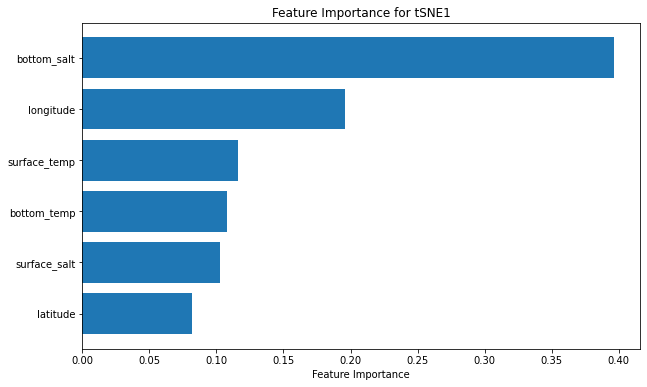

In [68]:
import matplotlib.pyplot as plt

importance_df_tSNE1 = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances_tSNE1
}).sort_values(by='Importance', ascending=False)

# importance_df_tSNE2 = pd.DataFrame({
#     'Feature': features.columns,
#     'Importance': feature_importances_tSNE2
# }).sort_values(by='Importance', ascending=False)

# Plot feature importances for tSNE1
plt.figure(figsize=(10, 6))
plt.barh(importance_df_tSNE1['Feature'], importance_df_tSNE1['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for tSNE1')
plt.gca().invert_yaxis()
plt.show()

# # Plot feature importances for tSNE2
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df_tSNE2['Feature'], importance_df_tSNE2['Importance'])
# plt.xlabel('Feature Importance')
# plt.title('Feature Importance for tSNE2')
# plt.gca().invert_yaxis()
# plt.show()


### CLASSIFICATION MODEL

Classification task
Predict the presence/absence of a certain species - classification task.

In [72]:
merged_df
ml_df2 = merged_df.iloc[:,11:]
ml_df2

## FILTER FOR eDNA values + OCEANOGRAPHIC DATA. REMOVE tSNE!!!

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Little_tunny_or_skipjack_tuna,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),...,White_catfish,Atl_salmon,latitude,longitude,surface_temp,surface_salt,bottom_temp,bottom_salt,tSNE1,tSNE2
0,0.000000,0.240067,0.008431,0.000000,0.000000,0.0,0.005233,0.002279,0.006085,0.003435,...,0.0,0.0,39.182897,-74.204214,7.207000,19.924286,6.984000,22.357692,-1.199833,0.834129
1,0.000000,0.010920,0.000726,0.000065,0.000000,0.0,0.000610,0.000182,0.031328,0.000000,...,0.0,0.0,39.104352,-74.207144,7.572200,0.060000,7.327800,0.037500,-1.163779,0.858735
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.028369,0.000000,0.000000,0.000000,...,0.0,0.0,39.272691,-74.092105,7.175250,18.300000,7.034833,22.330000,-1.221432,0.906516
3,0.000000,0.075304,0.000000,0.000000,0.000000,0.0,0.000000,0.016420,0.017985,0.000000,...,0.0,0.0,39.325567,-74.050293,7.141714,0.008571,6.951571,0.066429,-1.181889,0.860468
4,0.000000,0.158802,0.000000,0.000000,0.000000,0.0,0.044081,0.014342,0.000000,0.000000,...,0.0,0.0,39.215071,-74.129712,7.747545,21.470000,7.162100,22.380000,-1.203112,0.830597
5,0.000000,0.013282,0.025096,0.000000,0.000000,0.0,0.008265,0.000000,0.015334,0.004269,...,0.0,0.0,39.217271,-74.052457,7.412000,22.007000,7.383020,22.400000,-1.198773,0.819332
6,0.000000,0.008921,0.006158,0.000000,0.000000,0.0,0.018742,0.000000,0.036051,0.000000,...,0.0,0.0,39.216981,-74.440575,5.550700,0.083000,5.717857,0.105000,-1.194246,0.814601
7,0.015507,0.038603,0.004211,0.000465,0.000000,0.0,0.001601,0.000000,0.036010,0.000402,...,0.0,0.0,39.403917,-74.286663,4.890875,19.000000,5.516107,20.027500,-1.167169,0.860949
8,0.006269,0.051945,0.006176,0.000364,0.000000,0.0,0.000168,0.000000,0.033119,0.000000,...,0.0,0.0,39.550527,-74.130042,6.065100,18.135000,6.225100,21.723000,-1.194007,0.841869
9,0.008507,0.069150,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.047961,0.000000,...,0.0,0.0,39.472763,-74.004055,6.678375,22.031250,6.654333,22.150000,-1.189463,0.829771


In [ ]:

from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select features (oceanographic variables) and labels (presence/absence of multiple species)
features = df[['latitude', 'longitude', 'surface_temp', 'surface_salt', 'surface_pH', 'bottom_temp', 'bottom_salt', 'bottom_pH']]
labels = df.loc[:, 'Atl_herring':'Atl_salmon'].applymap(lambda x: 1 if x > 0 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Initialize and train the multi-output Random Forest classifier
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
for i, species in enumerate(labels.columns):
    print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))